# Implementation of N-Step TD Learning on FrozenLake-v1

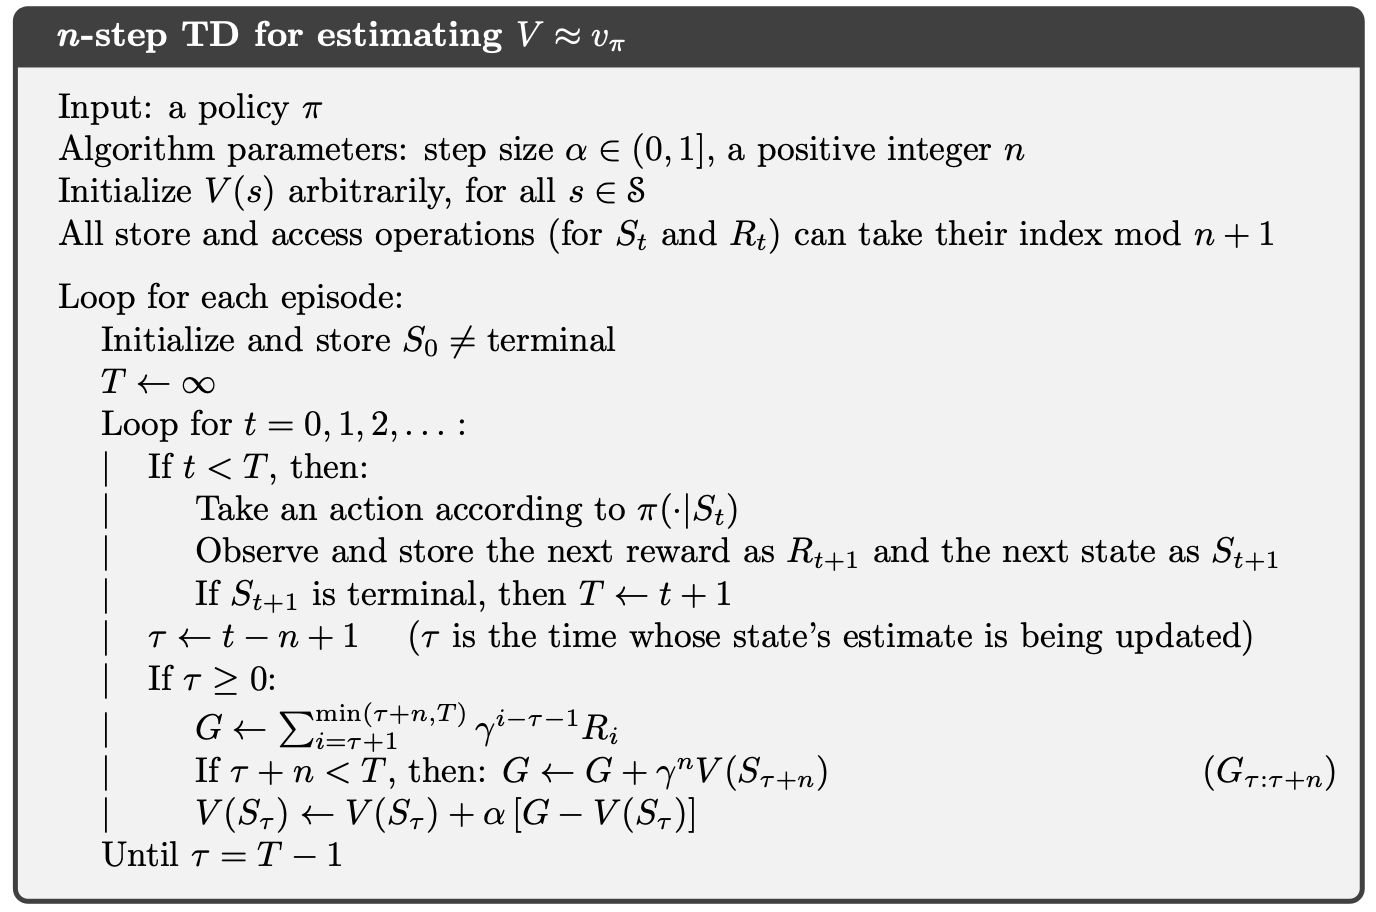

In [9]:
import gym
import numpy as np

# Parameters
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="human")
nS = env.observation_space.n 
nA = env.action_space.n 
gamma = 0.97
alpha = 0.5
maxEpisodes = 10
n = 2 # Number of Steps we want to take
inputPolicy = np.array([1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0], dtype=int) # Optimal Policy

# Initialization
V = np.zeros([nS])

# Looping Forever
for episode in range(maxEpisodes):
    initialState, _ = env.reset()
    T = np.inf
    t = 0
    trajectory = [(initialState, 0)] # (State, Reward)

    while True:
        if t < T:
            action = inputPolicy[initialState]
            nextState, reward, done, _, _ = env.step(action)

            # If the agent is still on ice, then give penalty for not finding the treasure.
            if reward == 0:
                reward = -0.001
            
            # If the agent falls into the hole, give a large penalty
            if done and nextState != 15:
                reward = -1
            
            # If agent took too long, penalize
            if t == 100:
                done = True
                reward = -1
            
            # Penalize if agent doesnt move
            if initialState == nextState:
                reward = -1
            
            trajectory.append([nextState, reward])

            if nextState == 15 or done:
                T = t + 1
            
            initialState = nextState
        
        tau = t - n + 1

        if tau >= 0:
            G = 0
            for i in range(tau+1, min(tau+n, T)+1):
                G += (gamma**(i-tau-1)) * trajectory[i][1]

            if tau + n < T:
                G += (gamma**(n)) * V[trajectory[tau+n][0]]

            V[trajectory[tau][0]] = V[trajectory[tau][0]] + alpha * (G - (V[trajectory[tau][0]]))
        
        if tau == T - 1:
            break

        t += 1

/Users/jasonchen/anaconda3/envs/rl/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[0.80713339 0.         0.         0.         0.83307662 0.
 0.         0.         0.89997003 0.9288246  0.         0.
 0.         0.96805371 0.99902344 0.        ]


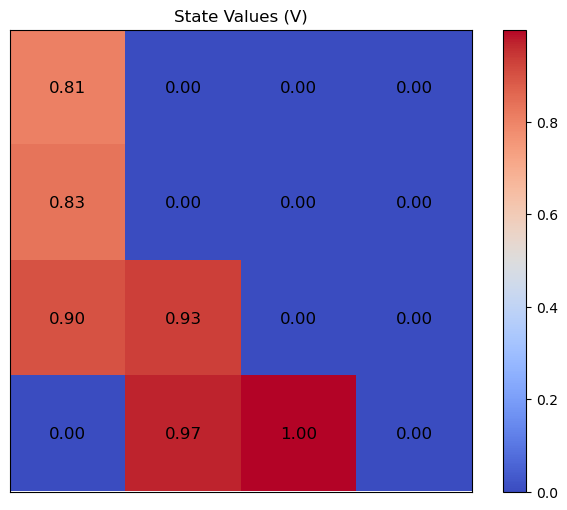

In [11]:
# Visualize State Values as a Heatmap
nrow, ncol = 4, 4  # Assuming a 4x4 grid for FrozenLake environment
values_grid = V.reshape((nrow, ncol))

plt.figure(figsize=(8, 6))
plt.imshow(values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('State Values (V)')
for i in range(nrow):
    for j in range(ncol):
        plt.text(j, i, f'{values_grid[i, j]:.2f}', ha='center', va='center', color='black', fontsize=12)
plt.xticks([])
plt.yticks([])
print(V)

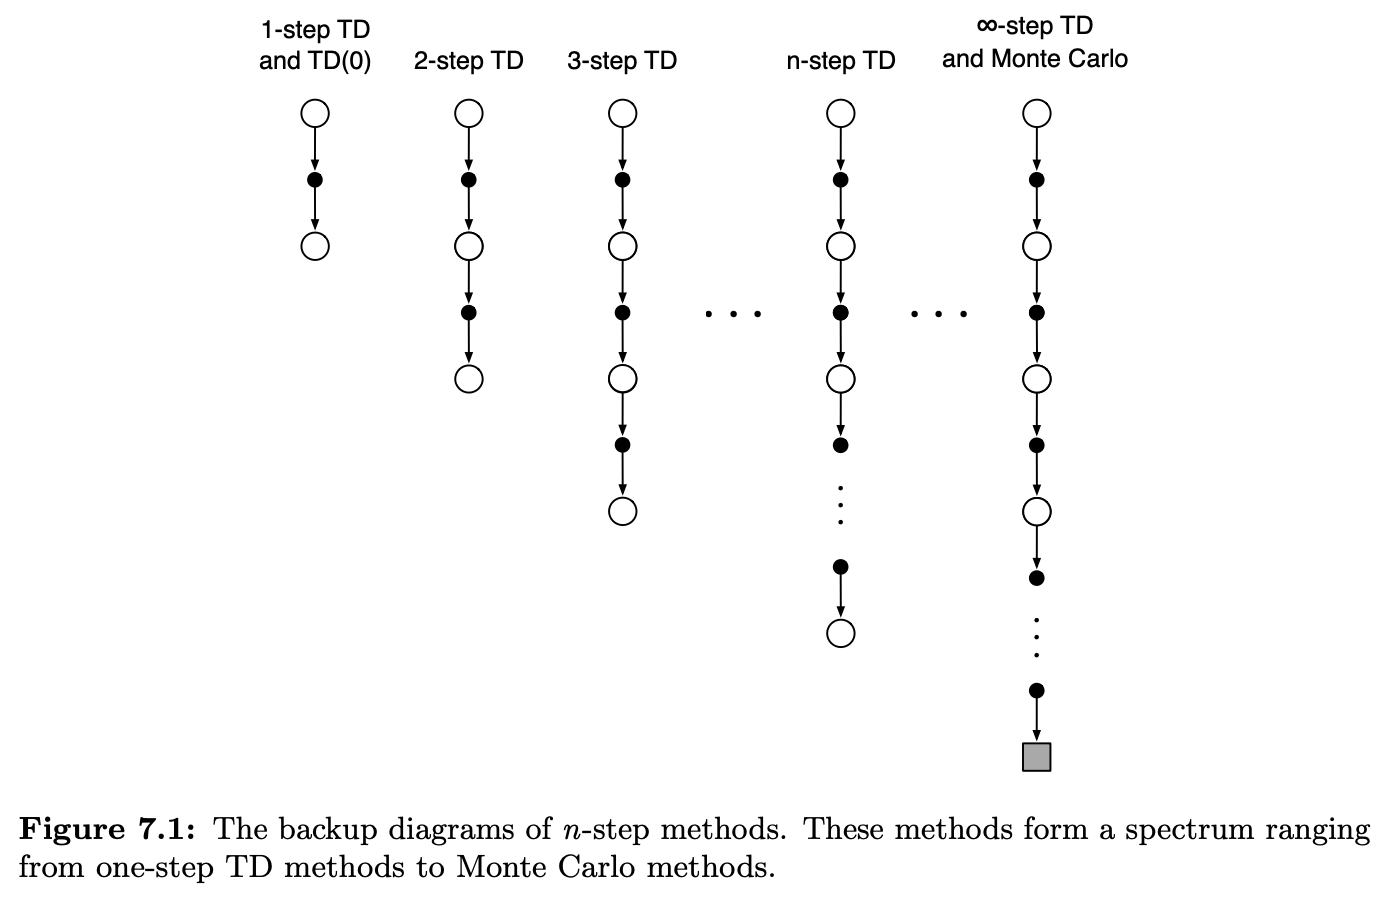

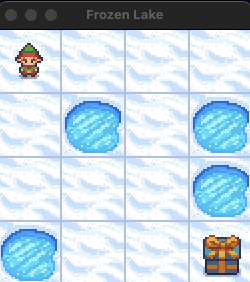

This is the layout of the map.